In [1]:
#@title Testo del titolo predefinito
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install pycaret==2.3.10 numpy==1.21.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.0.1
    Uninstalling Jinja2-3.0.1:
      Successfully uninstalled Jinja2-3.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
!pip install Jinja2==3.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.0.1-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB

from pycaret.classification import setup
from pycaret.classification import compare_models

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
path = '/content/drive/MyDrive/SB - Project Work/'

In [6]:
df = pd.read_csv(path+'train.csv')
df

,Unnamed: 0,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,s_phi,s_psi,s_ss3,s_a1,s_a2,s_a3,s_a4,s_a5,t_ch,t_resi,t_ins,t_resn,t_ss8,t_rsa,t_up,t_down,t_phi,t_psi,t_ss3,t_a1,t_a2,t_a3,t_a4,t_a5,Interaction
0,0,1aba,A,8,,D,-,0.331,10.0,17.0,-1.370,2.171,H,1.050,0.302,-3.656,-0.259,-3.242,A,35,,N,E,0.255,14.0,19.0,-1.519,2.142,H,0.945,0.828,1.299,-0.169,0.933,HBOND
1,1,1aba,A,8,,D,-,0.331,10.0,17.0,-1.370,2.171,H,1.050,0.302,-3.656,-0.259,-3.242,A,35,,N,E,0.255,14.0,19.0,-1.519,2.142,H,0.945,0.828,1.299,-0.169,0.933,VDW
2,2,1aba,A,37,,M,-,0.043,14.0,11.0,-2.222,1.506,H,-0.663,-1.524,2.219,-1.005,1.212,A,43,,F,-,0.472,6.0,14.0,-1.521,2.595,H,-1.006,-0.590,1.891,-0.397,0.412,VDW
3,3,1aba,A,5,,Y,E,0.000,20.0,21.0,-1.596,2.333,H,0.260,0.830,3.097,-0.838,1.512,A,66,,P,-,0.022,27.0,8.0,-1.436,2.924,H,0.189,2.081,-1.628,0.421,-1.392,Missing
4,4,1aba,A,39,,E,B,0.634,0.0,15.0,-2.661,2.866,H,1.357,-1.453,1.477,0.113,-0.837,A,42,,V,B,0.465,3.0,12.0,-2.073,2.008,H,-1.337,-0.279,-0.544,1.242,-1.262,HBOND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735505,444,7zee,A,93,,R,S,0.411,12.0,3.0,-2.087,2.431,H,1.538,-0.055,1.502,0.440,2.897,A,98,,K,H,0.078,17.0,8.0,-1.314,-0.413,H,1.831,-0.561,0.533,-0.277,1.648,VDW
735506,445,7zee,A,123,,I,H,0.030,17.0,19.0,-1.072,-0.846,H,-1.239,-0.547,2.131,0.393,0.816,A,127,,V,H,0.049,19.0,17.0,-1.218,-0.706,H,-1.337,-0.279,-0.544,1.242,-1.262,HBOND
735507,446,7zee,A,141,,F,H,0.005,17.0,22.0,-1.053,-0.982,H,-1.006,-0.590,1.891,-0.397,0.412,A,145,,L,H,0.000,22.0,13.0,-1.172,-0.700,H,-1.019,-0.987,-1.505,1.266,-0.912,HBOND
735508,447,7zee,A,141,,F,H,0.005,17.0,22.0,-1.053,-0.982,H,-1.006,-0.590,1.891,-0.397,0.412,A,145,,L,H,0.000,22.0,13.0,-1.172,-0.700,H,-1.019,-0.987,-1.505,1.266,-0.912,VDW


In [7]:
df.nunique()

Unnamed: 0     2752
pdb_id         1807
s_ch             12
s_resi         2608
s_ins             9
s_resn           20
s_ss8             8
s_rsa          1076
s_up             45
s_down           47
s_phi          4795
s_psi          5841
s_ss3             2
s_a1             20
s_a2             20
s_a3             20
s_a4             20
s_a5             20
t_ch             12
t_resi         2663
t_ins            10
t_resn           20
t_ss8             8
t_rsa          1077
t_up             45
t_down           48
t_phi          4810
t_psi          5796
t_ss3             2
t_a1             20
t_a2             20
t_a3             20
t_a4             20
t_a5             20
Interaction       7
dtype: int64

In [8]:
df.select_dtypes("object").columns

Index(['pdb_id', 's_ch', 's_ins', 's_resn', 's_ss8', 's_ss3', 't_ch', 't_ins',
       't_resn', 't_ss8', 't_ss3', 'Interaction'],
      dtype='object')

In [9]:
# we drop theses because there are too many nans and they're categorical
# expanded_df = df.drop(['s_ss8', 't_ss8']) 

columns_to_encode = ['s_ch', 's_ins', 's_resn', 's_ss3', 't_ch', 't_ins', 't_resn', 't_ss3', 'Interaction']

expanded_df = pd.get_dummies(df, columns = columns_to_encode)

expanded_df.drop(['s_ss8', 't_ss8'], axis = 1, inplace = True)

In [10]:
expanded_df.shape

(735510, 118)

In [11]:
expanded_df

,Unnamed: 0,pdb_id,s_resi,s_rsa,s_up,s_down,s_phi,s_psi,s_a1,s_a2,s_a3,s_a4,s_a5,t_resi,t_rsa,t_up,t_down,t_phi,t_psi,t_a1,t_a2,t_a3,t_a4,t_a5,s_ch_A,s_ch_AA,s_ch_AAA,s_ch_B,s_ch_BBB,s_ch_C,s_ch_E,s_ch_I,s_ch_N,s_ch_O,s_ch_P,s_ch_X,s_ins_,s_ins_A,s_ins_B,s_ins_C,s_ins_D,s_ins_E,s_ins_J,s_ins_K,s_ins_P,s_resn_A,s_resn_C,s_resn_D,s_resn_E,s_resn_F,s_resn_G,s_resn_H,s_resn_I,s_resn_K,s_resn_L,s_resn_M,s_resn_N,s_resn_P,s_resn_Q,s_resn_R,s_resn_S,s_resn_T,s_resn_V,s_resn_W,s_resn_Y,s_ss3_H,s_ss3_L,t_ch_A,t_ch_AA,t_ch_AAA,t_ch_B,t_ch_BBB,t_ch_C,t_ch_E,t_ch_I,t_ch_N,t_ch_O,t_ch_P,t_ch_X,t_ins_,t_ins_A,t_ins_B,t_ins_C,t_ins_D,t_ins_H,t_ins_I,t_ins_J,t_ins_K,t_ins_P,t_resn_A,t_resn_C,t_resn_D,t_resn_E,t_resn_F,t_resn_G,t_resn_H,t_resn_I,t_resn_K,t_resn_L,t_resn_M,t_resn_N,t_resn_P,t_resn_Q,t_resn_R,t_resn_S,t_resn_T,t_resn_V,t_resn_W,t_resn_Y,t_ss3_H,t_ss3_L,Interaction_HBOND,Interaction_IONIC,Interaction_Missing,Interaction_PICATION,Interaction_PIPISTACK,Interaction_SSBOND,Interaction_VDW
0,0,1aba,8,0.331,10.0,17.0,-1.370,2.171,1.050,0.302,-3.656,-0.259,-3.242,35,0.255,14.0,19.0,-1.519,2.142,0.945,0.828,1.299,-0.169,0.933,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,1,1aba,8,0.331,10.0,17.0,-1.370,2.171,1.050,0.302,-3.656,-0.259,-3.242,35,0.255,14.0,19.0,-1.519,2.142,0.945,0.828,1.299,-0.169,0.933,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2,1aba,37,0.043,14.0,11.0,-2.222,1.506,-0.663,-1.524,2.219,-1.005,1.212,43,0.472,6.0,14.0,-1.521,2.595,-1.006,-0.590,1.891,-0.397,0.412,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,3,1aba,5,0.000,20.0,21.0,-1.596,2.333,0.260,0.830,3.097,-0.838,1.512,66,0.022,27.0,8.0,-1.436,2.924,0.189,2.081,-1.628,0.421,-1.392,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,4,1aba,39,0.634,0.0,15.0,-2.661,2.866,1.357,-1.453,1.477,0.113,-0.837,42,0.465,3.0,12.0,-2.073,2.008,-1.337,-0.279,-0.544,1.242,-1.262,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735505,444,7zee,93,0.411,12.0,3.0,-2.087,2.431,1.538,-0.055,1.502,0.440,2.897,98,0.078,17.0,8.0,-1.314,-0.413,1.831,-0.561,0.533,-0.277,1.648,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
735506,445,7zee,123,0.030,17.0,19.0,-1.072,-0.846,-1.239,-0.547,2.131,0.393,0.816,127,0.049,19.0,17.0,-1.218,-0.706,-1.337,-0.279,-0.544,1.242,-1.262,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
735507,446,7zee,141,0.005,17.0,22.0,-1.053,-0.982,-1.006,-0.590,1.891,-0.397,0.412,145,0.000,22.0,13.0,-1.172,-0.700,-1.019,-0.987,-1.505,1.266,-0.912,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1

In [12]:
contact_types = df['Interaction'].unique().tolist()

In [13]:
filter_column_names = []
for contact_type in contact_types:
  filter_column_names.append('Interaction_' + contact_type)

In [14]:
filter_column_names

['Interaction_HBOND',
 'Interaction_VDW',
 'Interaction_Missing',
 'Interaction_PIPISTACK',
 'Interaction_SSBOND',
 'Interaction_IONIC',
 'Interaction_PICATION']

In [15]:
keep_outside = ['pdb_id', '']

In [16]:
df_exp = df.drop('pdb_id', 1)
df_exp = df_exp[['s_rsa', 's_up', 's_down', 's_phi', 's_psi', 's_a1', 's_a2', 's_a3', 's_a4', 's_a5', 't_rsa', 't_up', 't_down', 't_phi', 't_psi', 't_a1', 't_a2', 't_a3', 't_a4', 't_a5', 'Interaction']]
df_exp = df_exp.sample(frac = 1)
df_exp = df_exp.dropna()

In [17]:
import re
df_exp = df_exp.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [18]:
exp = setup(df_exp, 
            target = 'Interaction', 
            fold = 5, 
            # polynomial_features = True,
            # polynomial_degree = 3,
            #feature_interaction = True, 
            normalize = True)

,Description,Value
0,session_id,728
1,Target,Interaction
2,Target Type,Multiclass
3,Label Encoded,"HBOND: 0, IONIC: 1, Missing: 2, PICATION: 3, P..."
4,Original Data,"(652574, 21)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
bests = compare_models(exclude = ['gbc','lr', 'svm', 'et', 'knn', 'ada','rf', 'dt', 'qda','lda','nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5548,0.7343,0.3298,0.5443,0.5434,0.3090,0.3119,32.448
ridge,Ridge Classifier,0.5187,0.0000,0.1926,0.4783,0.4715,0.2035,0.2157,1.104
dummy,Dummy Classifier,0.4562,0.5000,0.1429,0.2081,0.2858,0.0000,0.0000,0.394


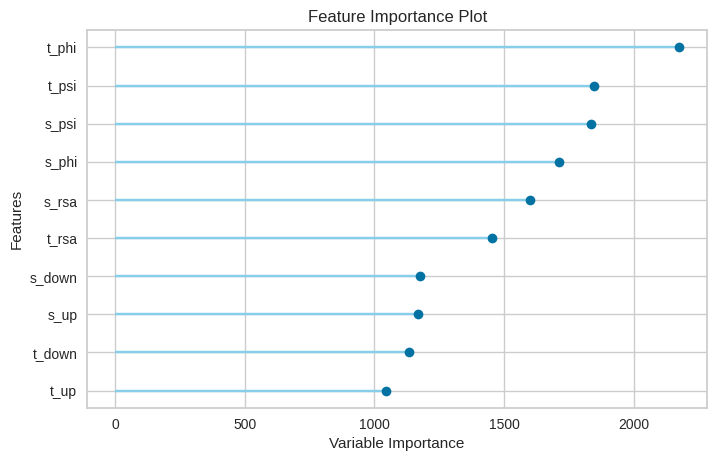

In [20]:
from pycaret.classification import plot_model

plot_model(bests, plot = 'feature')

In [21]:
from pycaret.classification import create_model

model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5663,0.7573,0.3614,0.5543,0.5538,0.3250,0.3281
1,0.5582,0.7417,0.3324,0.5465,0.5456,0.3135,0.3167
2,0.5298,0.6756,0.2843,0.5193,0.5201,0.2708,0.2729
3,0.5563,0.7373,0.3369,0.5455,0.5448,0.3117,0.3146
4,0.5634,0.7597,0.3342,0.5558,0.5525,0.3239,0.3270
Mean,0.5548,0.7343,0.3298,0.5443,0.5434,0.3090,0.3119
Std,0.0130,0.0306,0.0251,0.0131,0.0122,0.0198,0.0202


In [22]:
from pycaret.classification import tune_model

tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5792,0.7804,0.3787,0.5642,0.5659,0.3436,0.3466
1,0.5802,0.7824,0.3485,0.5658,0.5675,0.3462,0.3490
2,0.5794,0.7824,0.3584,0.5650,0.5671,0.3452,0.3479
3,0.5790,0.7788,0.3509,0.5648,0.5661,0.3435,0.3464
4,0.5787,0.7799,0.3641,0.5644,0.5659,0.3436,0.3465
Mean,0.5793,0.7808,0.3601,0.5648,0.5665,0.3444,0.3473
Std,0.0005,0.0014,0.0108,0.0006,0.0007,0.0011,0.0011


In [23]:
from pycaret.internal.tabular import predict_model
test = pd.read_csv(path+'test.csv')
pmodel = predict_model(tuned_model, data = test)
pmodel

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.0,0.7634,0,0,0,0,0


,Unnamed: 0,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,...,t_psi,t_ss3,t_a1,t_a2,t_a3,t_a4,t_a5,Interaction,Label,Score
0,0,1aba,A,8,,D,-,0.331,10.0,17.0,...,2.142,H,0.945,0.828,1.299,-0.169,0.933,HBOND,HBOND,0.3555
1,1,1aba,A,8,,D,-,0.331,10.0,17.0,...,2.142,H,0.945,0.828,1.299,-0.169,0.933,VDW,HBOND,0.3555
2,2,1aba,A,37,,M,-,0.043,14.0,11.0,...,2.595,H,-1.006,-0.590,1.891,-0.397,0.412,VDW,VDW,0.5021
3,3,1aba,A,5,,Y,E,0.000,20.0,21.0,...,2.924,H,0.189,2.081,-1.628,0.421,-1.392,Missing,Missing,0.4698
4,4,1aba,A,39,,E,B,0.634,0.0,15.0,...,2.008,H,-1.337,-0.279,-0.544,1.242,-1.262,HBOND,HBOND,0.5668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735505,444,7zee,A,93,,R,S,0.411,12.0,3.0,...,-0.413,H,1.831,-0.561,0.533,-0.277,1.648,VDW,Missing,0.5380
735506,445,7zee,A,123,,I,H,0.030,17.0,19.0,...,-0.706,H,-1.337,-0.279,-0.544,1.242,-1.262,HBOND,HBOND,0.6961
735507,446,7zee,A,141,,F,H,0.005,17.0,22.0,...,-0.700,H,-1.019,-0.987,-1.505,1.266,-0.912,HBOND,HBOND,0.6089
735508,447,7zee,A,141,,F,H,0.005,17.0,22.0,...,-0.700,H,-1.019,-0.987,-1.505,1.266,-0.912,VDW,HBOND,0.6089


In [24]:
from pycaret.internal.tabular import save_model
save_model(tuned_model, path+'saved_lr_model') 
#save the model as a file named "saved_lr_model" with extension ".pkl" (so "saved_lr_model.pkl")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Interaction', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20,

In [25]:
from pycaret.internal.tabular import load_model
lmodel = load_model(path+'saved_lr_model')
predict_model(lmodel, data = test)

Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.0,0.7634,0,0,0,0,0


,Unnamed: 0,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,...,t_psi,t_ss3,t_a1,t_a2,t_a3,t_a4,t_a5,Interaction,Label,Score
0,0,1aba,A,8,,D,-,0.331,10.0,17.0,...,2.142,H,0.945,0.828,1.299,-0.169,0.933,HBOND,HBOND,0.3555
1,1,1aba,A,8,,D,-,0.331,10.0,17.0,...,2.142,H,0.945,0.828,1.299,-0.169,0.933,VDW,HBOND,0.3555
2,2,1aba,A,37,,M,-,0.043,14.0,11.0,...,2.595,H,-1.006,-0.590,1.891,-0.397,0.412,VDW,VDW,0.5021
3,3,1aba,A,5,,Y,E,0.000,20.0,21.0,...,2.924,H,0.189,2.081,-1.628,0.421,-1.392,Missing,Missing,0.4698
4,4,1aba,A,39,,E,B,0.634,0.0,15.0,...,2.008,H,-1.337,-0.279,-0.544,1.242,-1.262,HBOND,HBOND,0.5668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735505,444,7zee,A,93,,R,S,0.411,12.0,3.0,...,-0.413,H,1.831,-0.561,0.533,-0.277,1.648,VDW,Missing,0.5380
735506,445,7zee,A,123,,I,H,0.030,17.0,19.0,...,-0.706,H,-1.337,-0.279,-0.544,1.242,-1.262,HBOND,HBOND,0.6961
735507,446,7zee,A,141,,F,H,0.005,17.0,22.0,...,-0.700,H,-1.019,-0.987,-1.505,1.266,-0.912,HBOND,HBOND,0.6089
735508,447,7zee,A,141,,F,H,0.005,17.0,22.0,...,-0.700,H,-1.019,-0.987,-1.505,1.266,-0.912,VDW,HBOND,0.6089


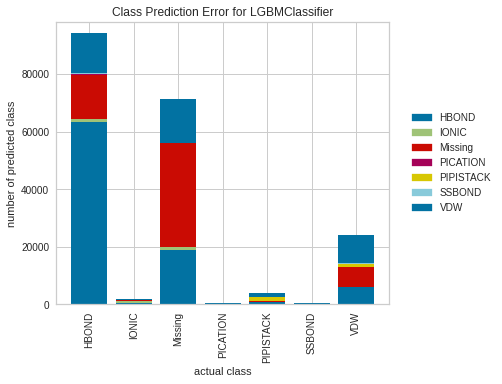

In [26]:
plot_model(tuned_model, plot = 'error')

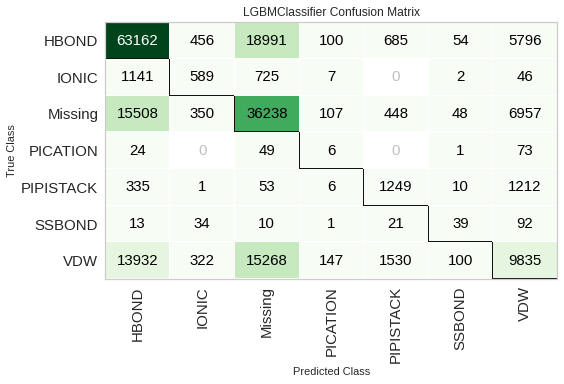

In [27]:
plot_model(tuned_model, plot = 'confusion_matrix')

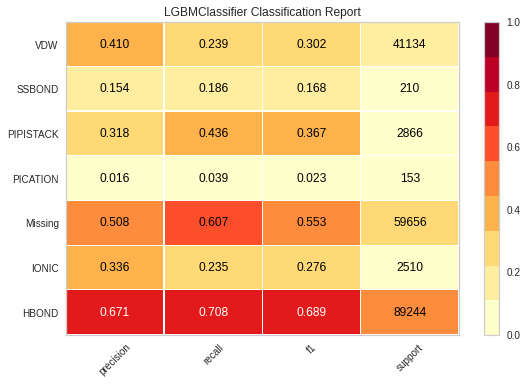

In [28]:
plot_model(tuned_model, plot = 'class_report')

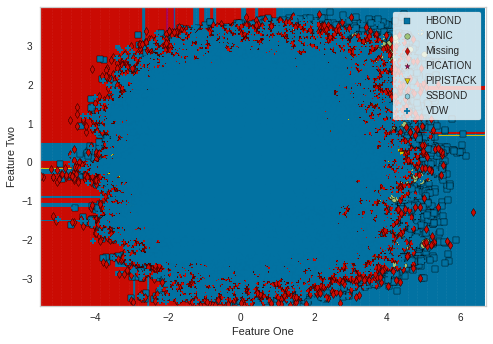

In [29]:
plot_model(tunedmodel, plot = 'boundary')

In [30]:
from pycaret.classification import evaluate_model
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…